# Setup

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
p = 0.01

df = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > p,
    sep=';'
)


# Funções 

In [4]:
def subgrupo(x):
    if x =='A':
        return 0
    if any((x =='B',x=='C',x=='D',x=='E')):
        return 1
    if any((x=='F',x=='G',x=='H',x=='I')):
        return 2
    if any((x=='J',x=='K',x=='L',x=='M')):
        return 3
    if any((x=='N',x=='O',x=='P',x=='Q')):
        return 4
    
df['Subgrupo_Renda'] = df['Q006'].apply(subgrupo)


def celular(x):
    if x =='A':
        return 'Sem Celular'
    if x == 'B' or x =='C' or  x =='D' or  x =='E':
        return 'Com Celular'

df['Celular'] = df['Q022'].apply(celular)


def computador(x):
    if x == 'A':
        return 'Sem Computador'
    else:
        return 'Com Computador'

df['Computador'] = df['Q024'].apply(computador)


def internet (x):
    if x =='A':
        return 'Sem Internet'
    else:
        return 'Com Internet'

df['Internet'] = df['Q025'].apply(internet)


In [5]:
# 	Nenhuma renda. 0
# Vou comparar com o Q

# B	Até R$ 998,00
# C	De R$ 998,01 até R$ 1.497,00.
# D	De R$ 1.497,01 até R$ 1.996,00.
# E	De R$ 1.996,01 até R$ 2.495,00.

# F	De R$ 2.495,01 até R$ 2.994,00.
# G	De R$ 2.994,01 até R$ 3.992,00.
# H	De R$ 3.992,01 até R$ 4.990,00.
# I	De R$ 4.990,01 até R$ 5.988,00.

# J	De R$ 5.988,01 até R$ 6.986,00.
# K	De R$ 6.986,01 até R$ 7.984,00.
# L	De R$ 7.984,01 até R$ 8.982,00.
# M	De R$ 8.982,01 até R$ 9.980,00.

# N	De R$ 9.980,01 até R$ 11.976,00.
# O	De R$ 11.976,01 até R$ 14.970,00.
# P	De R$ 14.970,01 até R$ 19.960,00.
# Q	Mais de R$ 19.960,00.


#Dropei valores nulos, assim como a média, notas (pessoas que n compareceram, ou zeraram a redação)
df = df.dropna()

#media
media = (df.NU_NOTA_CN+df.NU_NOTA_CH+df.NU_NOTA_LC+df.NU_NOTA_MT+df.NU_NOTA_REDACAO)/5
df['media'] = media


df.head(100)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q021,Q022,Q023,Q024,Q025,Subgrupo_Renda,Celular,Computador,Internet,media
0,190001004973,2019,1504422,Marituba,15,PA,16,M,1,3,...,A,B,A,A,A,1,Com Celular,Sem Computador,Sem Internet,466.38
3,190001005306,2019,1506807,Santarém,15,PA,19,F,1,3,...,A,C,A,A,A,1,Com Celular,Sem Computador,Sem Internet,467.40
4,190001005323,2019,1500800,Ananindeua,15,PA,19,M,1,1,...,B,B,A,B,B,1,Com Celular,Com Computador,Com Internet,498.50
5,190001005361,2019,1500602,Altamira,15,PA,16,F,1,3,...,A,B,A,A,B,1,Com Celular,Sem Computador,Com Internet,471.06
6,190001005401,2019,1501402,Belém,15,PA,22,M,1,3,...,A,A,A,A,A,0,Sem Celular,Sem Computador,Sem Internet,370.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,190001057411,2019,1504604,Mocajuba,15,PA,18,F,1,3,...,A,C,A,A,A,1,Com Celular,Sem Computador,Sem Internet,478.06
494,190001057436,2019,1503804,Jacundá,15,PA,18,M,1,2,...,A,D,B,B,B,1,Com Celular,Com Computador,Com Internet,525.00
496,190001057687,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,C,A,A,A,1,Com Celular,Sem Computador,Sem Internet,593.04
505,190001058376,2019,1501402,Belém,15,PA,19,M,1,3,...,A,E,A,A,B,1,Com Celular,Sem Computador,Com Internet,469.28


### GRÁFICO COMPARANDO OS SUBGRUPOS, ANALISANDO A RENDA MENSAL


### Subgrupo 0
 Nenhuma renda

### Subgrupo 1
998,00 até 2495,00

### Subgrupo 2
2495,01 até 5988,00

### Subgrupo 3
5998,01 até 6986,00

### Subgrupo 4
Mais de 6986,00

Valores em real



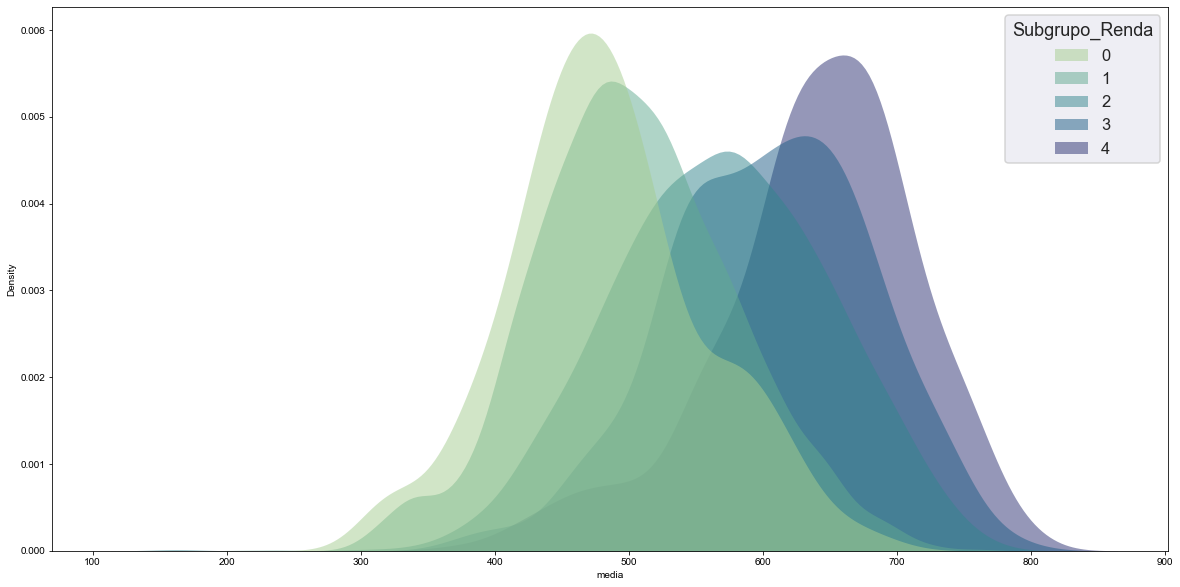

In [6]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10

sns.set_style('dark')
sns.set_context('talk')
sns.kdeplot(
   data=df, x="media", hue="Subgrupo_Renda",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

### GRAFICO COMPARANDO PESSOAS COM OU SEM CELULAR (INTERNET INCLUSA)

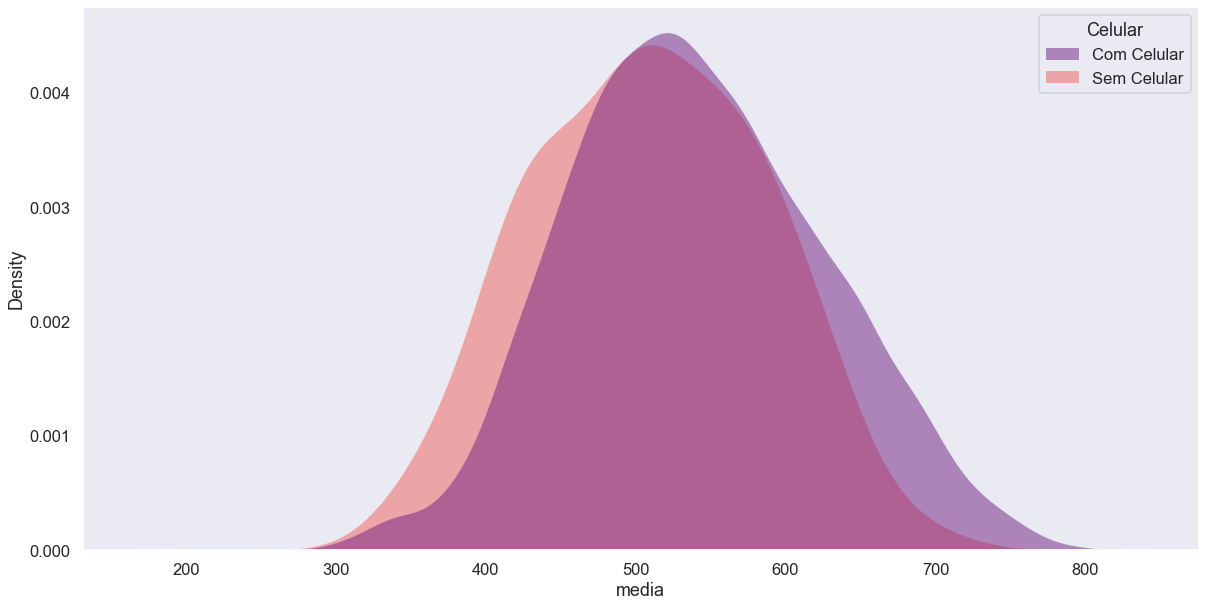

In [7]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10
cel_internet = df.loc[df['Q025'] == 'B']
cel_internet

sns.set_style('dark')
sns.set_context('talk')

sns.kdeplot(
   data=cel_internet, x="media", hue="Celular",
   fill=True, common_norm=False, palette="magma",
   alpha=.5, linewidth=0,
)
plt.show()

### GRAFICO COMPARANDO PESSOAS COM OU SEM COMPUTADOR (INTERNET INCLUSA)

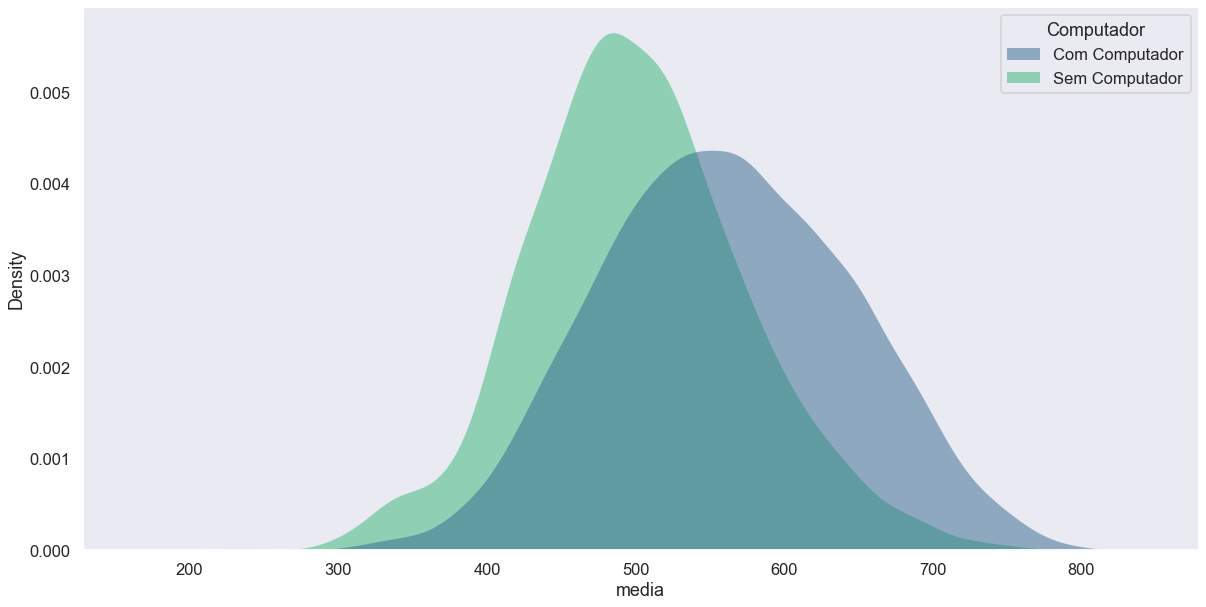

In [8]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10
pc_internet = df.loc[df['Q025'] == 'B']
pc_internet

sns.set_style('dark')
sns.set_context('talk')

sns.kdeplot(
   data=pc_internet, x="media", hue="Computador",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
)
plt.show()

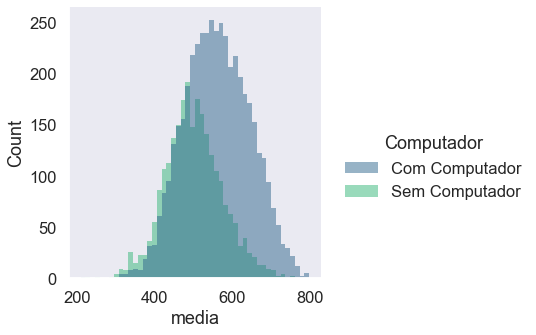

In [9]:

sns.set_style('dark')
sns.set_context('talk')
sns.displot(
   data= pc_internet,x="media", hue="Computador",
   fill=True, common_norm=False, palette="viridis",
   alpha=.5, linewidth=0,
    
)
plt.show()

# Gráfico pessoas com ou sem internet

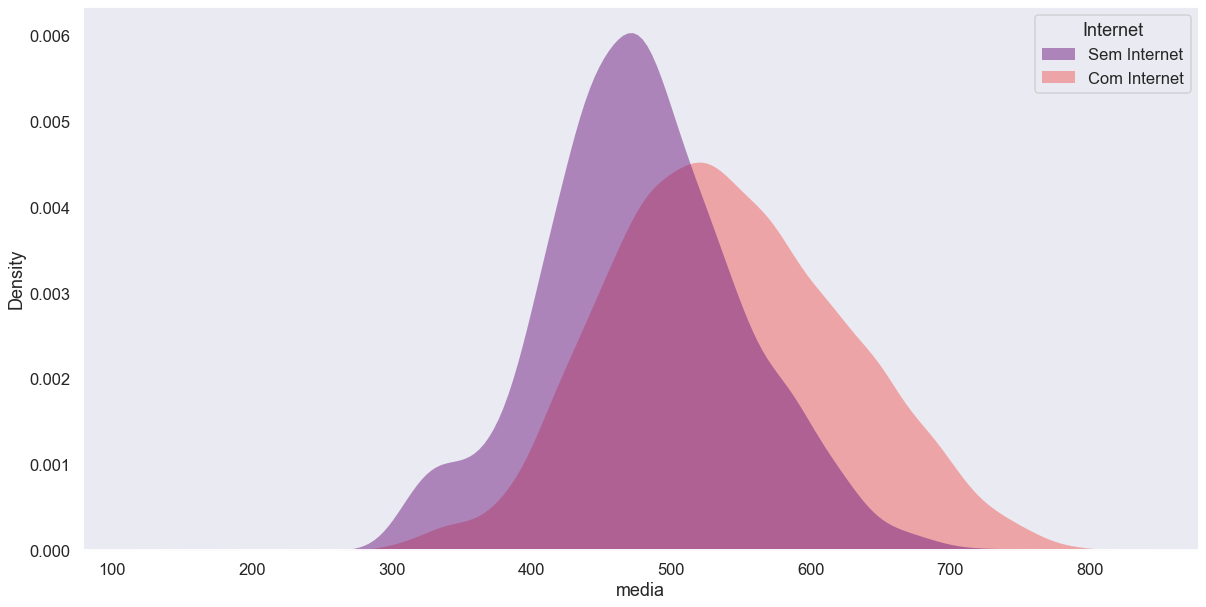

In [66]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10

sns.set_style('dark')
sns.set_context('talk')
sns.kdeplot(
   data= df,x="media", hue="Internet",
   fill=True, common_norm=False, palette="magma",
   alpha=.5, linewidth=0,
)
plt.show()

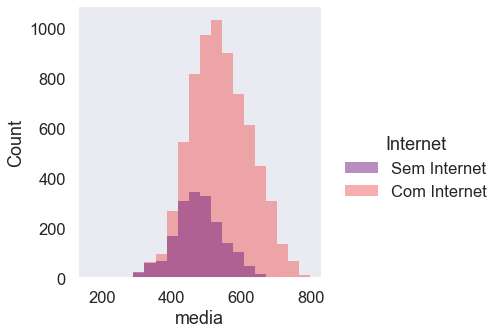

In [11]:
sns.set_style('dark')
sns.set_context('talk')

sns.displot(
   data= df,x="media", hue="Internet",
   fill=True, common_norm=False, palette="magma",
   alpha=.5, linewidth=0,
     kde=False, bins= 20
)
plt.show()

# NOTAS DE REDAÇÃO COMPARANDO RENDA

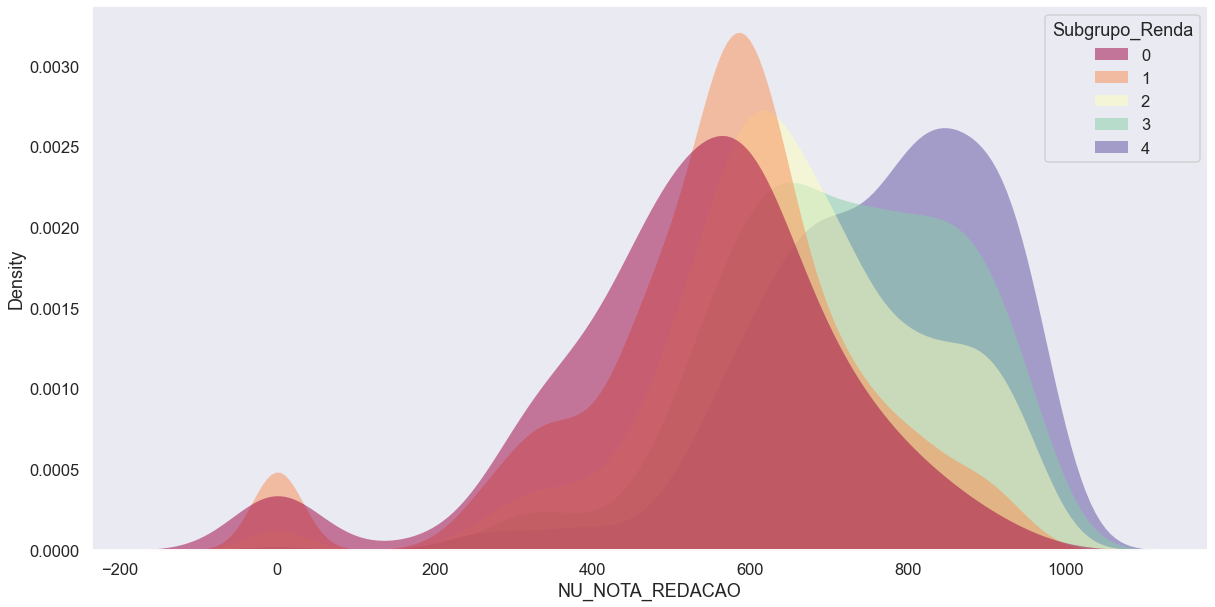

In [48]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10

sns.set_style('dark')
sns.set_context('talk')
sns.kdeplot(
   data= df,x="NU_NOTA_REDACAO", hue="Subgrupo_Renda",
   fill=True, common_norm=False, palette="Spectral",
   alpha=.5, linewidth=0,
)
plt.show()

# NOTAS DE MATEMATICA COMPARANDO RENDA

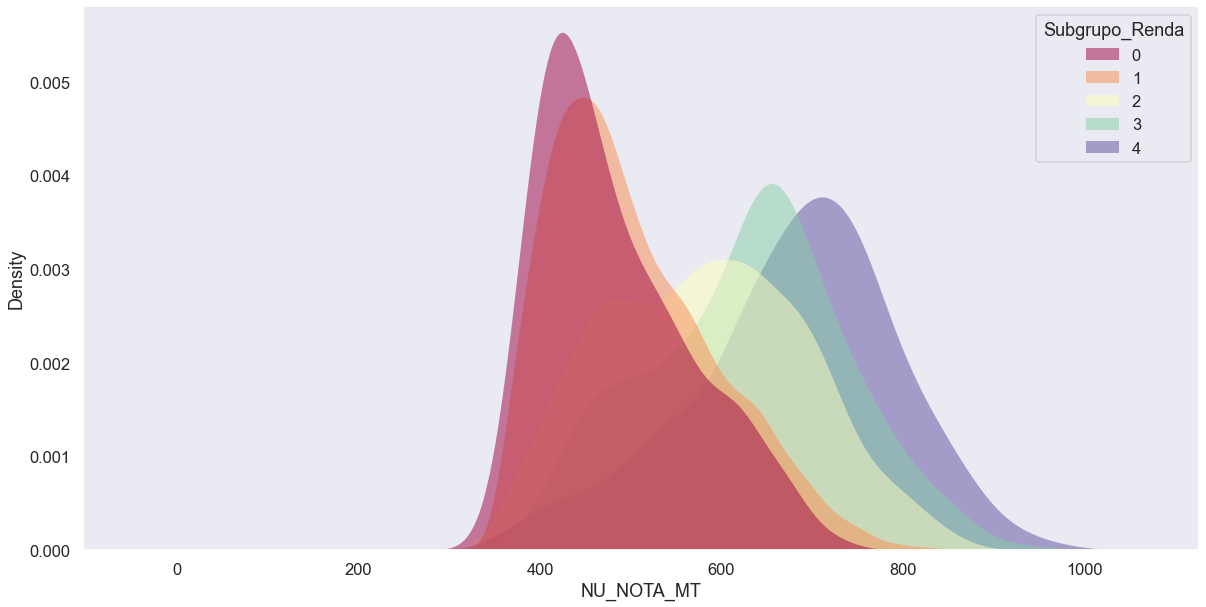

In [49]:
fig, ax = plt.subplots( figsize=(20, 10)) #cria uam figura com 1 linha, 2 colunas, de tamanho 20x10

sns.set_style('dark')
sns.set_context('talk')
sns.kdeplot(
   data= df,x="NU_NOTA_MT", hue="Subgrupo_Renda",
   fill=True, common_norm=False, palette="Spectral",
   alpha=.5, linewidth=0,
)
plt.show()